In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv(r"C:\Users\RAJ NANDANI\Downloads\marketing_campaign.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## EDA

In [3]:
df.shape

(2240, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

array([[<AxesSubplot:title={'center':'Year_Birth'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Kidhome'}>],
       [<AxesSubplot:title={'center':'Teenhome'}>,
        <AxesSubplot:title={'center':'MntWines'}>,
        <AxesSubplot:title={'center':'MntFruits'}>],
       [<AxesSubplot:title={'center':'MntMeatProducts'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

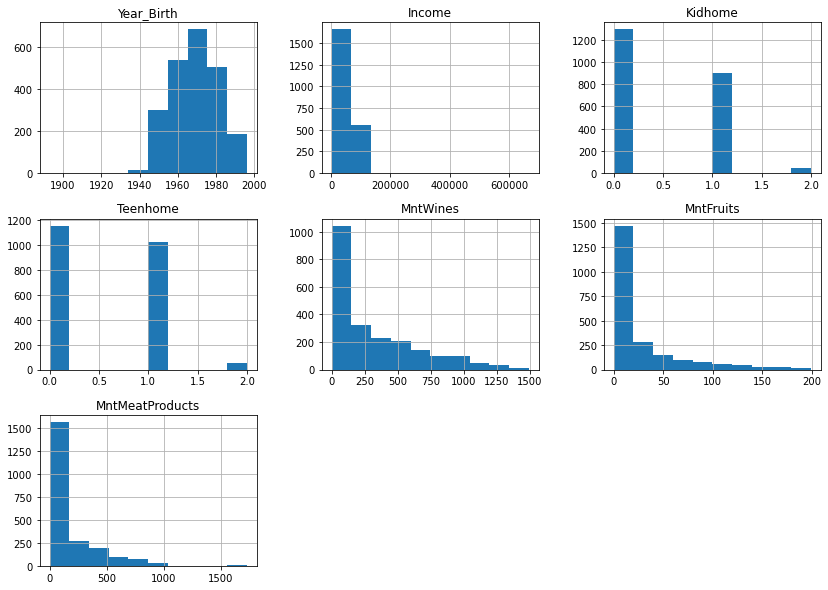

In [7]:
num_cols = ['Year_Birth','Education','Marital_Status','Income','Kidhome','Teenhome','MntWines','MntFruits','MntMeatProducts']
df.hist(column=num_cols, figsize=(14,10))

C:\Users\RAJ NANDANI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

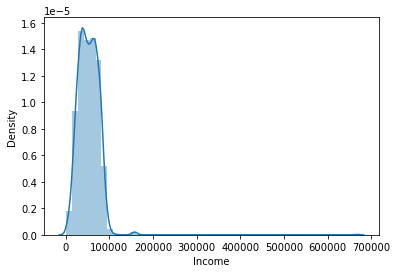

In [8]:
sns.distplot(df['Income'])

{'whiskers': [<matplotlib.lines.Line2D at 0x211e3df75b0>,
 'caps': [<matplotlib.lines.Line2D at 0x211e3df7b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x211e3df72e0>],
 'medians': [<matplotlib.lines.Line2D at 0x211e3dd7130>],
 'fliers': [<matplotlib.lines.Line2D at 0x211e3dd7400>],
 'means': []}

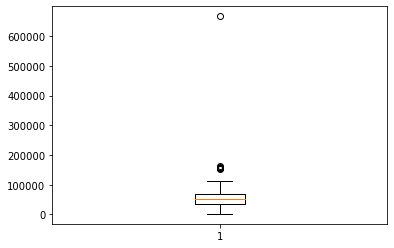

In [52]:
plt.boxplot(df['Income'])

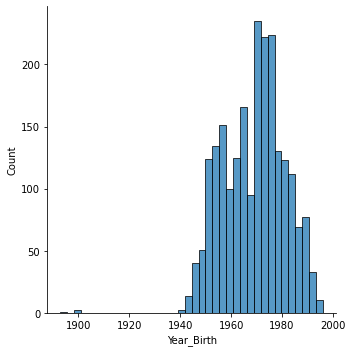

In [10]:
sns.displot(df['Year_Birth'])

In [14]:
df['Year_Birth'].value_counts().head()

1976    89
1971    87
1975    83
1972    79
1978    77
Name: Year_Birth, dtype: int64

In [15]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [16]:
rel=df.groupby('Education').mean()['Income'].reset_index()
rel

,Education,Income
0,2n Cycle,47688.583744
1,Basic,20306.259259
2,Graduation,52707.305679
3,Master,52896.777027
4,PhD,56096.303498


<AxesSubplot:xlabel='Education', ylabel='Income'>

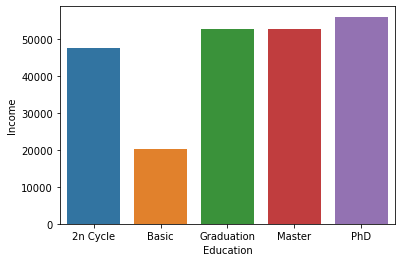

In [17]:
sns.barplot(x=rel['Education'],y=rel['Income'])

## data preprocessing

In [50]:
df[df['Income']<=200000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,re_Marital_Status,Family_Size,Cmp_accepted,Tot_Products,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,1,1,1,1617,57
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,1,3,0,27,60
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,2,2,0,776,49
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,2,3,0,53,30
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,2,3,0,422,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,3,11,0,2,3,0,1341,47
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,3,11,0,2,5,1,444,68
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,3,11,0,1,1,1,1241,33
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,3,11,0,2,3,0,843,58


In [51]:
df.fillna(df['Income'].median(),inplace=True)
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
re_Marital_Status      0
Family_Size            0
Cmp_accepted           0
Tot_Products           0
Age                    0
dtype: int64

In [18]:
 #First deal with marital status
#df.Marital_Status.unique() 
# we simply put the customer into 2 categories: in_relationship and not_in_relationship
# combineing the relationship to the teen and kid at home:
# adding 2 to the family size if the customer is in relationship, on the contrary, we add one 


In [19]:
df.Marital_Status.unique() 

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [20]:
cust_relationship = {
    'Single' : 1,
    'Together' : 2,
    'Married' : 2,
    'Divorced' : 1,
    'Widow' : 1,
    'Alone' : 1,
    'Absurd' : 1,
    'YOLO' : 1
}

df['re_Marital_Status'] = df['Marital_Status'].map(cust_relationship)

for i in range(len(df)):
    df['Family_Size'] = df['re_Marital_Status'] + df['Teenhome'] + df['Kidhome']

## sum all the accepted campigans 

In [21]:
df['Cmp_accepted'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + \
df['AcceptedCmp5'] + df['Response']
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,re_Marital_Status,Family_Size,Cmp_accepted
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,1,1,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,1,3,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,2,2,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,2,3,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,2,3,0


In [22]:
df.shape

(2240, 32)

In [23]:
df['Dt_Customer'].unique()

array(['04-09-2012', '08-03-2014', '21-08-2013', '10-02-2014',
       '19-01-2014', '09-09-2013', '13-11-2012', '08-05-2013',
       '06-06-2013', '13-03-2014', '15-11-2013', '10-10-2012',
       '24-11-2012', '24-12-2012', '31-08-2012', '28-03-2013',
       '03-11-2012', '08-08-2012', '06-01-2013', '23-12-2012',
       '11-01-2014', '18-03-2013', '02-01-2013', '27-05-2013',
       '20-02-2013', '31-05-2013', '22-11-2013', '22-05-2014',
       '11-05-2013', '29-10-2012', '29-08-2013', '31-12-2013',
       '02-09-2013', '11-02-2014', '01-02-2013', '29-04-2013',
       '12-03-2013', '05-11-2013', '02-10-2013', '28-06-2014',
       '09-11-2012', '24-05-2013', '01-01-2014', '08-11-2012',
       '12-05-2014', '11-08-2012', '07-06-2014', '12-06-2013',
       '19-11-2012', '02-04-2013', '28-04-2014', '17-06-2013',
       '03-03-2014', '04-07-2013', '07-09-2012', '18-02-2013',
       '11-06-2013', '06-12-2013', '21-05-2013', '11-05-2014',
       '19-03-2014', '27-09-2013', '08-04-2013', '11-09

In [24]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")


In [25]:
df['Tot_Products'] = df['MntFishProducts'] + df['MntFruits'] + df['MntMeatProducts'] + \
    df['MntWines'] + df['MntSweetProducts'] + df['MntGoldProds']

In [26]:
df.drop_duplicates(inplace=True)

In [27]:
df['Age'] = 2014 - df['Year_Birth']

In [28]:
df2 = df.loc[: ,['Age','Income', 'Recency', 'Family_Size','Cmp_accepted','NumDealsPurchases','Tot_Products','NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']]

In [29]:
df2.shape

(2240, 11)

In [30]:
df2.describe()

,Age,Income,Recency,Family_Size,Cmp_accepted,NumDealsPurchases,Tot_Products,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,45.194196,52237.975446,49.109375,2.595089,0.446875,2.325000,605.798214,4.084821,2.662054,5.790179,5.316518
std,11.984069,25037.955891,28.962453,0.906959,0.890543,1.932238,602.249288,2.778714,2.923101,3.250958,2.426645
min,18.000000,1730.000000,0.000000,1.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,35538.750000,24.000000,2.000000,0.000000,1.000000,68.750000,2.000000,0.000000,3.000000,3.000000
50%,44.000000,51381.500000,49.000000,3.000000,0.000000,2.000000,396.000000,4.000000,2.000000,5.000000,6.000000
75%,55.000000,68289.750000,74.000000,3.000000,1.000000,3.000000,1045.500000,6.000000,4.000000,8.000000,7.000000
max,121.000000,666666.000000,99.000000,5.000000,5.000000,15.000000,2525.000000,27.000000,28.000000,13.000000,20.000000


In [31]:
# standardize the data before PCA to avoid putting more weight on the columns who have large value
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2)
df2_scaled

array([[ 0.98534473,  0.23569584,  0.30703926, ...,  2.51089024,
        -0.55078479,  0.69390374],
       [ 1.23573295, -0.23545419, -0.38366418, ..., -0.56871962,
        -1.1661254 , -0.13046347],
       [ 0.3176428 ,  0.77399892, -0.79808624, ..., -0.22654075,
         1.29523705, -0.54264708],
       ...,
       [-1.01776106,  0.18947568,  1.44669994, ...,  0.11563813,
         2.21824797,  0.28172013],
       [ 1.06880747,  0.67940139, -1.41971934, ...,  0.79999587,
         1.29523705, -0.95483068],
       [ 1.23573295,  0.02520835, -0.31459383, ..., -0.56871962,
        -0.55078479,  0.69390374]])

In [32]:
pca = PCA()
pca.fit(df2_scaled)

PCA()

In [33]:
pca.explained_variance_ratio_
pca.explained_variance_ratio_.cumsum()

array([0.36366356, 0.50844568, 0.60988507, 0.69874694, 0.77437532,
       0.83893879, 0.88775367, 0.92581118, 0.95843549, 0.98602287,
       1.        ])

Text(0, 0.5, 'cumculative explained variance')

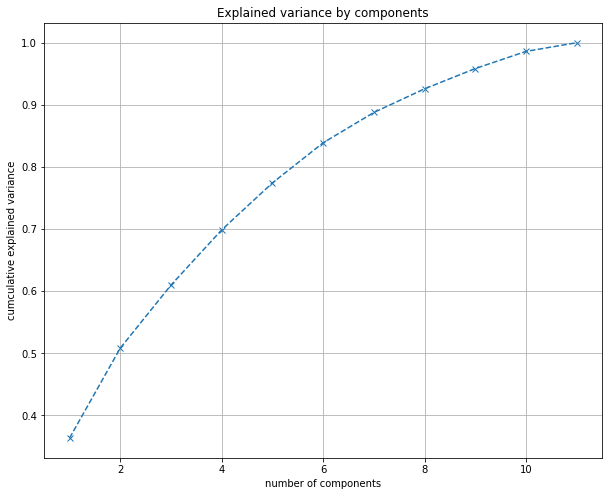

In [34]:
plt.figure(figsize=(10,8))
plt.grid()
plt.plot(range(1,12), pca.explained_variance_ratio_.cumsum(), marker='x', linestyle="--")
plt.title('Explained variance by components')
plt.xlabel('number of components')
plt.ylabel('cumculative explained variance')

In [35]:
#as rule of thumb, we take the number of components that account for 85% of the explained variance
pca6 = PCA(n_components=6)

In [36]:
pca6.fit(df2_scaled)

PCA(n_components=6)

In [37]:
pca6.transform(df2_scaled)
score_pca6 = pca6.transform(df2_scaled)
score_pca6

array([[ 2.52151977,  0.60435481, -0.5228366 , -0.50482072,  1.35262239,
        -1.28999732],
       [-1.58316392, -0.44775421,  0.92533531,  1.37037635,  0.54641805,
         0.24101862],
       [ 1.52278051,  0.10848464,  0.06354048,  0.73741884, -0.99192422,
        -1.21803167],
       ...,
       [ 1.69087453, -1.18407185, -0.12913699, -2.00099728, -0.15806775,
        -0.6799432 ],
       [ 1.65194139,  0.66553995,  0.45152304,  1.81039324, -0.90708127,
        -0.08118186],
       [-1.26600534,  0.99857459,  0.20136434,  1.14131617,  1.22345534,
         0.7631204 ]])

## k means clustering

In [38]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans_pca.fit(score_pca6)
    wcss.append(kmeans_pca.inertia_)

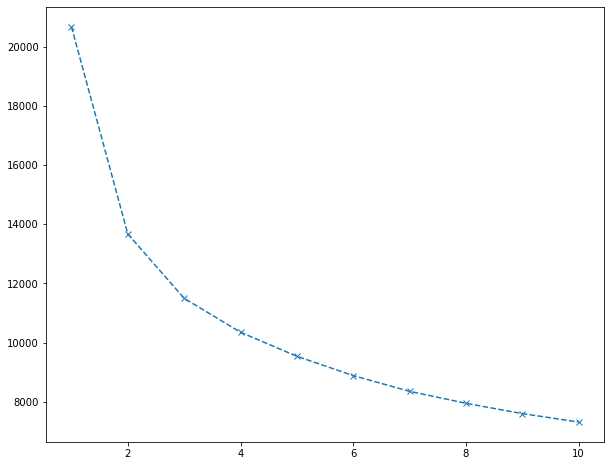

In [39]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker='x', linestyle='--')

In [40]:
#from the graph above, we choose 3 as the number of clusters since the curve becomes smoother after 3
kmeans_pca = KMeans(n_clusters= 3, init='k-means++', random_state= 20)
kmeans_pca.fit_transform(score_pca6)

array([[2.98430405, 4.84546752, 2.42066454],
       [3.3447507 , 1.71467481, 4.58848636],
       [2.17239157, 3.80681255, 2.36727219],
       ...,
       [3.50539907, 4.14918107, 2.37023234],
       [2.37736755, 4.17223193, 2.77226051],
       [2.77451812, 2.33139955, 4.6204135 ]])

In [41]:
pd.DataFrame(score_pca6)

,0,1,2,3,4,5
0,2.521520,0.604355,-0.522837,-0.504821,1.352622,-1.289997
1,-1.583164,-0.447754,0.925335,1.370376,0.546418,0.241019
2,1.522781,0.108485,0.063540,0.737419,-0.991924,-1.218032
3,-2.045993,-0.660508,-0.814654,0.083942,-0.928892,0.262612
4,-0.254212,1.021766,0.578726,-1.805348,-0.613116,0.701134
...,...,...,...,...,...,...
2235,0.869836,0.847896,0.047736,0.030172,-0.174642,-0.438521
2236,-0.488585,3.887604,0.591811,0.794058,1.339662,1.026828
2237,1.690875,-1.184072,-0.129137,-2.000997,-0.158068,-0.679943
2238,1.651941,0.665540,0.451523,1.810393,-0.907081,-0.081182


In [42]:
df2_pca_kmeans = pd.concat([df2.reset_index(drop=True), \
    pd.DataFrame(score_pca6)], axis=1)
df2_pca_kmeans.columns.values[-6:] = ['pc1', 'pc2','pc3', 'pc4','pc5','pc6']

df2_pca_kmeans['cluster'] = kmeans_pca.labels_

In [43]:
df2_pca_kmeans .head()

,Age,Income,Recency,Family_Size,Cmp_accepted,NumDealsPurchases,Tot_Products,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,pc1,pc2,pc3,pc4,pc5,pc6,cluster
0,57,58138.0,58,1,1,3,1617,8,10,4,7,2.521520,0.604355,-0.522837,-0.504821,1.352622,-1.289997,2
1,60,46344.0,38,3,0,2,27,1,1,2,5,-1.583164,-0.447754,0.925335,1.370376,0.546418,0.241019,1
2,49,71613.0,26,2,0,1,776,8,2,10,4,1.522781,0.108485,0.063540,0.737419,-0.991924,-1.218032,0
3,30,26646.0,26,3,0,2,53,2,0,4,6,-2.045993,-0.660508,-0.814654,0.083942,-0.928892,0.262612,1
4,33,58293.0,94,3,0,5,422,5,3,6,5,-0.254212,1.021766,0.578726,-1.805348,-0.613116,0.701134,0


In [44]:
df2_pca_kmeans['cluster'] = df2_pca_kmeans['cluster'].map({0:'First', 1:'Second', 2:'Third'})
df2_pca_kmeans.head()

,Age,Income,Recency,Family_Size,Cmp_accepted,NumDealsPurchases,Tot_Products,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,pc1,pc2,pc3,pc4,pc5,pc6,cluster
0,57,58138.0,58,1,1,3,1617,8,10,4,7,2.521520,0.604355,-0.522837,-0.504821,1.352622,-1.289997,Third
1,60,46344.0,38,3,0,2,27,1,1,2,5,-1.583164,-0.447754,0.925335,1.370376,0.546418,0.241019,Second
2,49,71613.0,26,2,0,1,776,8,2,10,4,1.522781,0.108485,0.063540,0.737419,-0.991924,-1.218032,First
3,30,26646.0,26,3,0,2,53,2,0,4,6,-2.045993,-0.660508,-0.814654,0.083942,-0.928892,0.262612,Second
4,33,58293.0,94,3,0,5,422,5,3,6,5,-0.254212,1.021766,0.578726,-1.805348,-0.613116,0.701134,First


<AxesSubplot:xlabel='pc2', ylabel='pc1'>

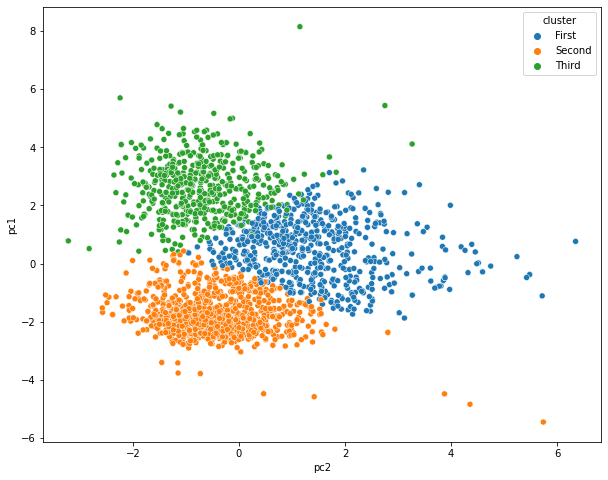

In [45]:
plt.figure(figsize = (10,8))
sns.scatterplot(x='pc2', y='pc1', data=df2_pca_kmeans, hue='cluster', hue_order=['First', 'Second','Third'])

In [46]:
df2_pca_kmeans.groupby(['cluster']).size().to_frame().reset_index()

,cluster,0
0,First,641
1,Second,1031
2,Third,568


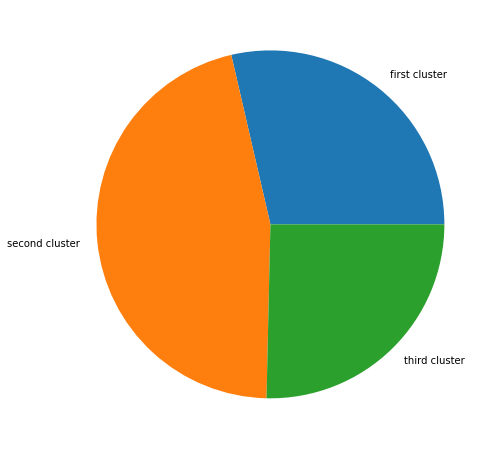

In [47]:
plt.figure(figsize = (8,8))
pie = df2_pca_kmeans.groupby(['cluster']).size().to_frame().reset_index()
pie.rename(columns={0: 'count'}, inplace=True)

pie_labels = ['first cluster', 'second cluster', 'third cluster']
plt.pie(pie['count'], labels=pie_labels)
plt.show()

<AxesSubplot:xlabel='cluster', ylabel='Age'>

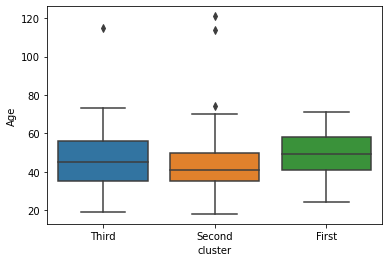

In [48]:
sns.boxplot(y='Age', x='cluster', data=df2_pca_kmeans )


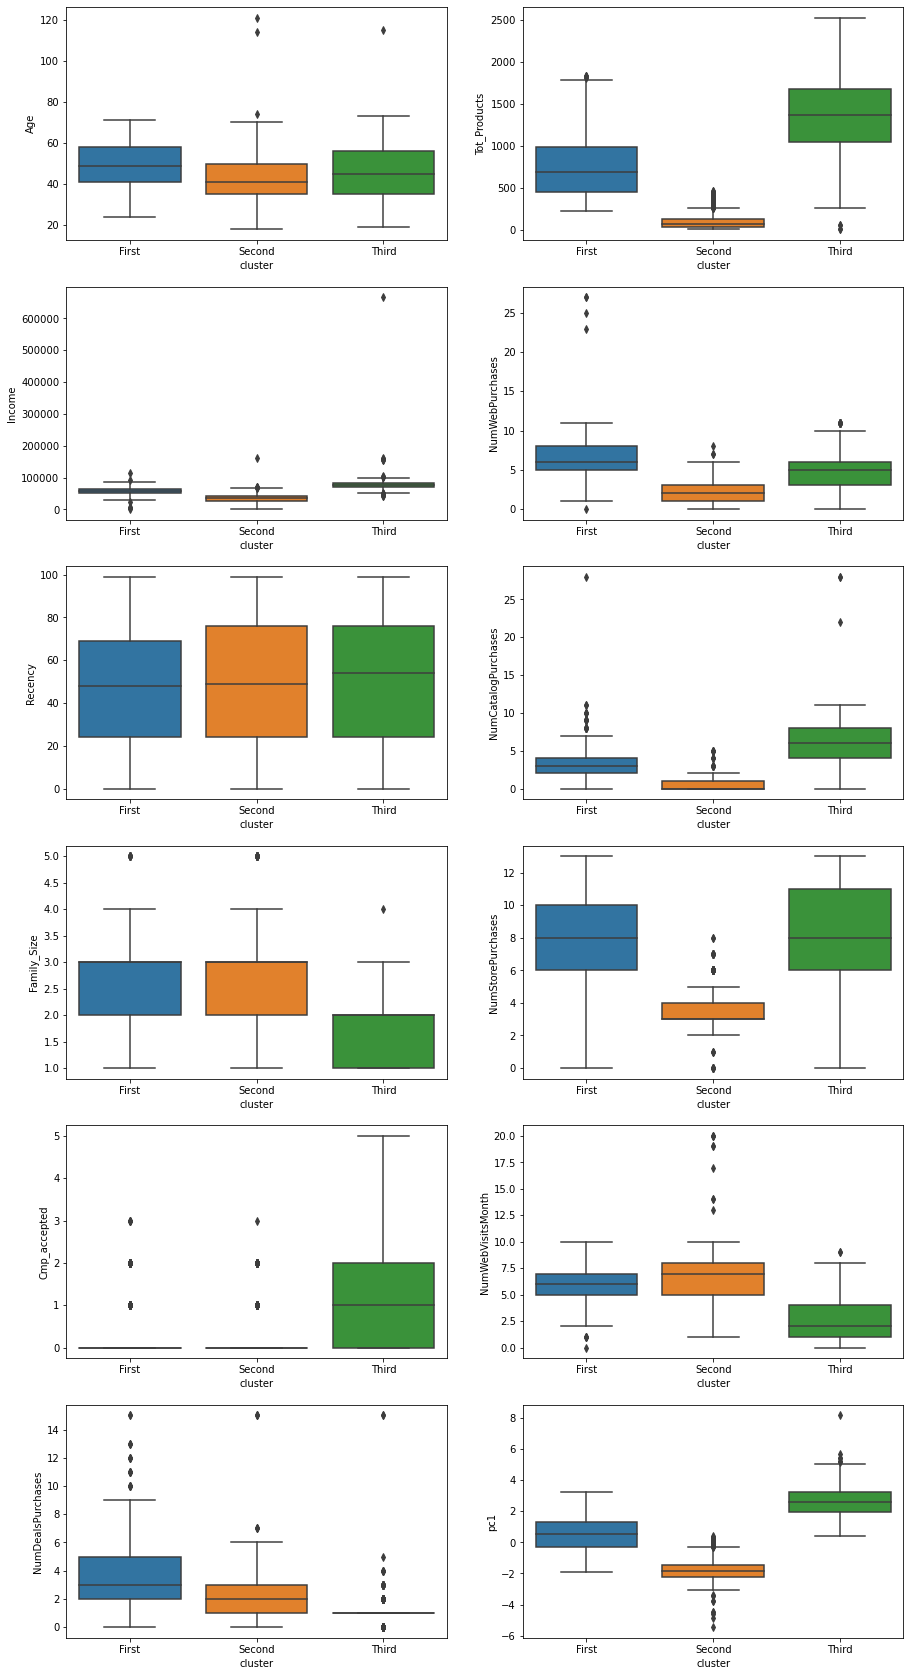

In [49]:
fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(15,30))
for cols, x in zip(df2_pca_kmeans.columns[:6], range(6)):
    for y in range(1):
        sns.boxplot(y=cols, x='cluster', data=df2_pca_kmeans, order=['First', 'Second','Third'], ax=axs[x,y], showfliers = True )

for cols, x in zip(df2_pca_kmeans.columns[6:], range(6)):
    for y in range(1,2):
        sns.boxplot(y=cols, x='cluster', data=df2_pca_kmeans, order=['First', 'Second','Third'], ax=axs[x,y], showfliers = True )

##Results and Conclusion 
Group 1: Average Customers

People in this group have an average income, buy the average amount of products. Most of them engage in only one campaign,but they make more purchases when there is a discount. They tendto shop online more often than the other two groups.

Group 2: Low-Income and Low-Engagemnet Customers

This group of customers has the lowest purchasing ability andspend very little on this company. Nearly all of them don’tparticipate in a campaign. However, they like to visit theonline shop homepage.

Group 3: High-Income and High-Spending Customers

Contrary to the second group, the third group has the highest incomeand purchasing record. Customers in this cluster usually have smallfamily sizes, accept more campaigns and love to make purchases instores or catalogs. They don’t visit shop website much but they stillmake moderate numbers of the web purchase. Also, the discount isnot attractive to them.

It is important to note that the size of the second group is the largest as it accounts for nearly half of the total customers. The size ofthe other two groups is similar. The company may leverage the current customer base and offer moreand launch campaigns to stimulate the shopping desire of the first andthird group of customers. More promotion on online stores can bemade to attack the second group of buyers since they spend much timebrowsing the webpage but make little purchases